# Searching for images on Bing using Requests, Beautifulsoup and Selenium

### Download images from Bing using two methods: through a combination of Requests and BeautifulSoup and through Selenium

<img src='./img/mosaico_portada.jpg' windth=800>

### **Consideraciones legales y éticas**

Esta publicación no trata sobre cómo extraer datos de una página web con fines ilegales.
Hay que asegurarse de tener permiso antes de extraer ciertos tipos de datos que puede violar los términos del servicio o incluso regulaciones legales:

- Revise los términos de uso de la página web en relación a los permisos de extracción de datos.
- Priorice el uso de las APIs, si están disponibles, ya que proporcionan acceso legal a los datos.
- Póngase en contacto directamente con el propietario de la página web para comprobar el permiso de extracción de datos.

### **Introducción**

Bing es un motor de búsqueda desarrollado por Microsoft que, o bien mediante una búsqueda estándar o bien aplicando una serie de filtros, podemos encontrar imágenes, videos, compras, noticias, mapas y otras categorìas.

En este proyecto, me centraré sobre cómo se pueden obtener imágenes de Bing de diferentes tipos aplicando una serie de filtros, usando por un lado una combinación de Requests y BeautifulSoup y por otro lado una combinación de BeautifulSoup y Selenium.

### **Consideraciones previas sobre la url**

En la URL de una búsqueda de imágenes en Bing 'https://www.bing.com/images/search?', los términos que siguen al símbolo de interrogación ('?') son parámetros que se utilizan para especificar la búsqueda. Estos parámetros y sus valores definen lo que se está buscando y cómo se deben mostrar los resultados.

Vemos algunos de los parámetros más comunes:

- `q=` : Este es el parámetro más importante, ya que define el término de búsqueda. Por ejemplo, si buscas "gatos", la URL incluirá q = "gatos".

- `form=` : Este parámetro especifica el formato o tipo de formulario utilizado en la búsqueda. A veces, puede estar relacionado con la versión de la interfaz de usuario que se está utilizando. Puede tener los siguientes valores:

    - `HDRSC`: indica que la búsqueda se ha realizado desde la barra de búsqueda de encabezado (header search) en la interfaz de Bing.

    - `HDRSC2` : versión 2 de HDRSC

    - `IRFLTR` : Este valor se utiliza a menudo cuando se aplican filtros adicionales a la búsqueda de imágenes. Indica que la búsqueda está utilizando una interfaz de filtrado específico.

    - `QBIR` : Este valor aparece cuando se realiza una búsqueda inversa de imágenes (es decir, buscar usando una imagen en lugar de texto, por ejemplo subiendo una imagen para buscarla). "QBIR" podría representar "Query By Image Results".

    - `OIPF` : Indica que la búsqueda de imágenes se inició desde una interfaz o página optimizada para dispositivos móviles.

    - `PWS` : Utilizado cuando la búsqueda se realiza desde la barra de búsqueda de la página de inicio de Bing.

    - `PD` : Este valor puede estar asociado con búsquedas que se realizan desde la sección de noticias de Bing o cuando los resultados se personalizan según un contexto específico, como resultados para imágenes destacadas.

    - `HSNT` : Aparece cuando se busca desde la pestaña de noticias, pero relacionado con imágenes vinculadas a noticias.

    - `IPLTS` : Podría estar asociado a la búsqueda de imágenes desde una interfaz que da prioridad a los resultados de "Trending" o populares.

    - `SCR` : Indica una búsqueda realizada desde el carrusel de imágenes en una página de resultados de Bing, que suele ser utilizado cuando se navega visualmente entre resultados sugeridos.

- `scope=` : Define el alcance de la búsqueda. En el contexto de imágenes, normalmente estará configurado para buscar solo imágenes.

- `qft=` : Este parámetro puede definir filtros adicionales aplicados a la búsqueda, como el tamaño de la imagen, el color, el tipo, etc. Por ejemplo, para filtrar solo imágenes de tamaño grande, podría ser algo como qft = "+filterui:imagesize-large".

- `sp=` : Se refiere a páginas específicas de resultados. Por ejemplo, sp=-1 podría indicar la primera página de resultados.

- `pq=` : Muestra el término de búsqueda original que se utilizó, que a veces puede diferir ligeramente de lo que se muestra en q= debido a la autocorrección u otras modificaciones automáticas.

- `tsc=` : Este parámetro se relaciona con opciones de filtrado específicas. Por ejemplo, podría estar relacionado con el idioma o la región. Tipos de valores:

    - `ImageHoverTitle`: Este valor podría indicar que las imágenes en los resultados de búsqueda mostrarán un título o leyenda cuando el usuario pase el cursor sobre ellas.

    - `ImageBasicHover`: Similar al anterior, pero con una interfaz más básica o simple. Esto puede activar un estilo más sencillo de efectos al pasar el ratón, como resaltar la imagen o mostrar solo información mínima.

    - `ImageHoverDetails`: Este valor sugiere que, al pasar el cursor sobre una imagen, se mostrarán detalles adicionales, como la resolución de la imagen, el sitio web de origen, o información relacionada.

    - `ImageList`: Indica un estilo de presentación básico o estándar de las imágenes sin efectos avanzados al pasar el ratón.

    - `ImageHoverOverlay`: Este valor podría hacer que, al pasar el ratón sobre una imagen, se muestre una capa superpuesta con opciones adicionales, como botones para compartir, guardar, o similares.

- `first=` : Indica el número de resultados omitidos antes del primer resultado mostrado en la página actual. Esto se utiliza para la paginación.

- `adlt=` : Este parámetro establece el nivel de filtrado de contenido adulto (SafeSearch). Por ejemplo, adlt = "strict" aseguraría que no se muestren imágenes explícitas.

- `count=` : Número de resultados por página

**Ejemplo de cómo funciona**

1. Accedemos a la url 'https://www.bing.com/images'
2. Escribimos lo que queramos buscar en el buscador de bing. Por ejemplo "kangaroo".
3. Establecemos algunos de los filtros que hay filtros:
    - Tamaño de la imagen: Pequeño
    - Color: Todo
    - Tipo: Fotografía
    - Diseño: cuadrado
4. A medida que vamos estableciendo los filtros, podemos observar que la url va cambiando, porque se van agregando los filtros a la url. 

<img src='./img/url.jpg'>



Para este caso la url que aparece es:

'https://www.bing.com/images/search?sp=1&lq=0&sc=2-0&cvid=8505C473CD124E80AA9FCFE848AE24FD&q=kangaroo&qft=+filterui:imagesize-small+filterui:photo-photo+filterui:aspect-square&form=IRFLTR&first=1'

En ella podemos identificar, por ejemplo:

- q = "kangaroo"
- qft = "+filterui:imagesize-small+filterui:photo-photo+filterui:aspect-square"
- form = "IRFLTR"
- first = "1"

### **Utilizando Requests y BeautifulSoup**

##### **Instalación de dependencias**

Asumiendo que ya tenemos instalado python (en mi caso estoy trabajando en un entorno conda con la versión 3.12.2 de python), las librerías necesarias para la ejecución del código son:

- ipykernel:  kernel de Jupyter necesario para ejecutar Python.
- tqdm: herramienta útil para crear barras de progeso en bucles.
- joblib: biblioteca que permite la serialización de objetos Python.
- scipy: biblioteca para el cálculo avanzado que permite manipular y visualizar datos de alto nivel.
- request: librería que permite hacer peticiones HTTP
- bs4: librería BeautifulSoup que permite extraer datos de HTML y XML.


Ejecutamos en la terminal el siguiente código:

`pip install ipykernel tqdm joblib scipy matplotlib requests bs4`

##### **Importación de dependencias**

In [1]:
import os # proporciona funcionalidad del sistema operativo
import numpy as np # cálculos matemáticos con vectores y matrices
import matplotlib.pyplot as plt # visualización de datos
import time # funciones relacionadas con el tiempo
import random # funciones para obtener números aleatorios
import requests # realizar peticiones HTTP
from bs4 import BeautifulSoup # extraer datos de HTML y XML
from PIL import Image # para visualizar imágenes
from io import BytesIO # para crear un buffer en memoria que se comporta como un archivo, sin necesidad de almacenamiento físico
import urllib.parse # manipular urls y sus componentes, para descomponerlas o construirlas

##### **Funciones útiles**

Según lo que vimos anteriormente, tenemos que definir la url que integre lo que estamos buscando y los filtros que queremos aplicar. Para ello construimos la siguiente función:

In [5]:
def definir_url(query, filtros, num_imagenes=24):
    """ 
    Defino una url para que me devuelva las primeras 24 imagenes.
    A través de request, bing tiene limitada la busqueda a 24.
    Args:
    query: imagen que buscamos,
    filtros: definimos los filtros que aplicamos a la búsqueda,
    num_imagenes : número de imágenes durante la búsqueda (por defecto 24)
    """
    
    # Crear la URL de búsqueda de Bing Images
    base_url = "https://www.bing.com/images/search"
    params = {
        "q": query, # imagen que buscamos
        "form": "HDRSC2", #"IRFLTR"
        "first": "1",
        "tsc": "ImageBasicHover",
        "count": num_imagenes  # Número de imágenes que se desean
    }

    # Añadir filtros a la URL
    if filtros:
        params.update(filtros)

    url = f"{base_url}?{urllib.parse.urlencode(params)}"
    
    return url 

Si inspeccionamos una de las imágenes de la búsqueda, vemos que están en una etiqueta `<img>` y que tienen clase "mimg" y utiliza un `scr` para definir el enlace a la imagen (aunque en algunas ocasiones utiliza un `data-src`)

Teniendo en cuenta esta información, construimos la siguiente función para realizar la búsqueda de imágenes:

In [6]:
def busqueda_imagenes(url, num_imagenes):
    """ 
    Hace busquedas a la url de 24 en 24 imagenes.
    Bing tiene la busqueda por request limitada a 24.
    Nos devolverá el num_imagenes que le especifiquemos.
    Args:
    url: url que nos devuelve la función definir_url(),
    num_imagenes : número de imágenes durante la búsqueda.
    """
    
    # Realizar la solicitud HTTP    
    imagenes = []    
    # Inicializamos la cuenta de imágenes del primer conjunto de 24 imagenes
    count = 0 
    
    while len(imagenes) < num_imagenes:  
              
        headers = {"User-Agent": "Mozilla/5.0"} 
        response = requests.get(url, headers=headers) 
        # Espera inicial para que la página cargue
        time.sleep(5)  

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # Buscar todas las etiquetas de imagen
            for img in soup.find_all('img', class_="mimg"):
                img_url = img.get('src') or img.get('data-src')
                
                # Verifico que img_url sea válida (que exista y que empiece por http)
                if img_url and img_url.startswith("http"):
                    imagenes.append(img_url)
                
                # Limitar el número de imágenes    
                if len(imagenes) >= num_imagenes:
                    break                
            
            # Avanza al siguiente conjunto de 24 imágenes    
            count += 24            
                    
        else:
            print("No se pudo acceder a Bing Images.")
            return []
        
    return imagenes

Finalmente, ya sólo nos queda descargar las imágenes encontradas y guardarlas en la carpeta que le indiquemos. Construimos una función que nos lo haga:

In [7]:
def descargar_imagenes(query, imagenes, carpeta_destino):
    """ 
    descarga las imágenes encontradas y las guarda en una carpeta.
    Args:
    query: imagen que queremos buscar,
    imagenes: lista de imágenes que nos devuelve la función busqueda_imagenes(),
    carpeta_destino: especificamos la ruta de la carpeta.
    """
    
    # Crea la carpeta si no existe
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)
    
    # Descargo y guardo la imagen
    for i, img_url in enumerate(imagenes):
        try:
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            
            # formateo el nombre de la imagen
            img_format = img.format.lower()
            
            # guardo la imagen
            img.save(os.path.join(carpeta_destino, f"{query}_{i}.{img_format}"))
            print(f"{query}_{i} descargada.")
        except Exception as e:
            print(f"No se pudo descargar la imagen {img_url}. Error: {e}")

##### **Búsqueda, descarga y guardado de imágenes**

Vamos a buscar las imágenes de perritos, con los filtros que definimos antes. La url resultante de esta búsqueda es:

'https://www.bing.com/images/search?q=puppy&qs=n&form=QBIR&qft=+filterui%3Aimagesize-small+filterui%3Acolor2-color+filterui%3Aphoto-photo+filterui%3Aaspect-square&sp=-1&lq=0&pq=puppy&sc=10-5&cvid=A30C751ECB2C408992868B66EB4F1884&ghsh=0&ghacc=0&first=1'

Teniendo en cuenta esta url, empezamos a definir nuestras variables y a ejecutar las funciones anteriores.

In [8]:
# Definir las variables
query = "puppy"
filtros = {    
    "qft": "+filterui%3Aimagesize-small+filterui%3Acolor2-color+filterui%3Aphoto-photo+filterui%3Aaspect-square"
    }
num_imagenes = 50

# Definir la url
url = definir_url(
    query = query, 
    filtros = filtros,    
)

# Búsqueda de imágenes
imagenes_encontradas = busqueda_imagenes(url, num_imagenes)

# Descargar y guardar imagenes
if imagenes_encontradas:
    print("Imágenes encontradas:")
    for img in imagenes_encontradas:
        print(img)

    # Descargar las imágenes
    carpeta_destino = f'imagenes_{query}'
    descargar_imagenes(query, imagenes_encontradas, carpeta_destino)
else:
    print("No se encontraron imágenes con los filtros proporcionados.")

Imágenes encontradas:
https://tse3.mm.bing.net/th/id/OIP.bIJOhdYM0HQ_D67ut0SUxQHaLH?w=116&h=180&c=7&r=0&o=5&pid=1.7
https://tse2.mm.bing.net/th/id/OIP.NciQloy4mJU0QV2d_m_yJwHaHa?w=174&h=180&c=7&r=0&o=5&pid=1.7
https://tse1.mm.bing.net/th/id/OIP.2kcDoSnfm-G8Ogj0HJIl_wHaE8?w=260&h=180&c=7&r=0&o=5&pid=1.7
https://tse2.mm.bing.net/th/id/OIP.CTjQKMw5K_59DvAI8Kc9dwHaE1?w=267&h=180&c=7&r=0&o=5&pid=1.7
https://tse4.mm.bing.net/th/id/OIP.L97KJB_-1MxxZMlnZXoj6wHaIO?w=155&h=180&c=7&r=0&o=5&pid=1.7
https://tse4.mm.bing.net/th/id/OIP.ji92t0pP4aAWOhmRsc8ZUwHaIt?w=160&h=189&c=7&r=0&o=5&pid=1.7
https://tse4.mm.bing.net/th/id/OIP.aNNp-HQ9Lkjz5iC8OSFkDQHaJV?w=150&h=189&c=7&r=0&o=5&pid=1.7
https://tse2.mm.bing.net/th/id/OIP.kkODp13n8PgMyVe9naL5vAHaHa?w=189&h=189&c=7&r=0&o=5&pid=1.7
https://tse2.mm.bing.net/th/id/OIP.sh9_2BsRoaWAcHgIf2XAfQHaE8?w=284&h=189&c=7&r=0&o=5&pid=1.7
https://tse2.mm.bing.net/th/id/OIP.4xVJIm8XAgrA63EejEQ4dgHaHa?w=189&h=189&c=7&r=0&o=5&pid=1.7
https://tse2.mm.bing.net/th/id/OIP.UiR

##### **Visualización de las imágenes**

Visualizamos en forma de mosaico algunas de las imágenes descargadas

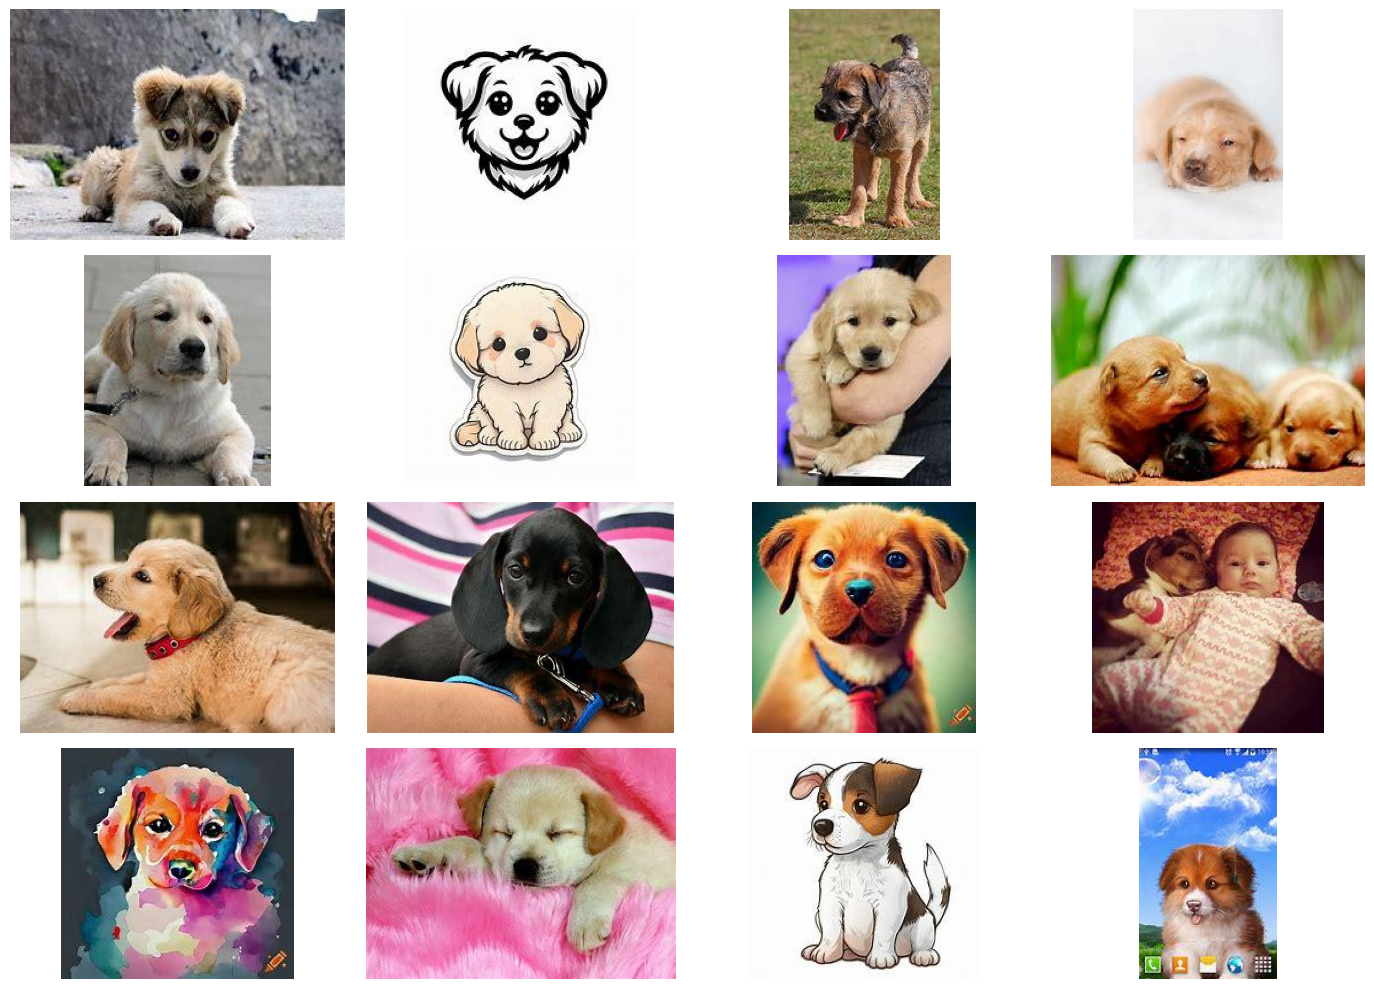

In [18]:
# Lista de archivos de las imagenes
list_img = os.listdir(carpeta_destino)

# cargo todas las imagenes
imagenes = [Image.open(os.path.join(carpeta_destino,archivo)) for archivo in list_img]
len(imagenes)

# Visualizamos varias imágenes
fig = plt.figure(figsize = (14,10))

# Elije 16 imágenes aleatorias
for n, i in enumerate(random.sample(range(0,len(imagenes)), 16)):
    fig.add_subplot(4, 4, n+1) # n_rows, n_col, subplot  
    img = imagenes[i] 
    plt.imshow(img)    
    plt.axis('off') # desactivo ejes
# Ajustar el layout para que no se solapen las imágenes
plt.tight_layout()

### **Utilizando BeautifulSoup y Selenium**

A la hora de hacer un web scraping, funciona mejor el uso de selenium que el requests, ya que son más fáciles de salvar las limitaciones que impone bing en el scraping.

##### **Instalación de selenium**

Podemos instalar el selenium de 2 maneras:

1. Manualmente:

- Descargarlo en https://pypi.org/project/selenium/#files y descomprimirlo
- Ejecutar: python setup.py install

2. Mediante pip (package installer for python):

- Ejecutar: pip install -U selenium

Utilizando la segunda opción, ejecuto en el terminal:

`pip install -U selenium`

##### **Instalación del driver del navegador**

Necesitamos un driver para que selenium haga interfaz con el navegador seleccionado. Algunos de ellos:

- Safari -> https://webkit.org/blog/6900/webdriver-support-in-safari-10/
- Firefox/mozilla -> https://github.com/mozilla/geckodriver/releases
- Edge -> https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/
- Chrome -> https://chromedriver.chromium.org/downloads

Por otro lado, "webdriver_manager" es una biblioteca que permite gestionar automáticamente los controladores de diferentes navegadores. En la actualidad soporta los siguientes controladores:

- ChromeDriver
- EdgeChromiumDriver
- GeckoDriver
- IEDriver
- OperaDriver

En mi caso, haré uso de Chrome, por lo que instalaré el "webdriver_manager" vía "pip":

`pip install webdriver_manager`

##### **Importación de dependencias**

In [15]:
import os # proporciona funcionalidad del sistema operativo
import time # funciones relacionadas con el tiempo
import random # funciones para obtener números aleatorios
import requests # realizar peticiones HTTP
from bs4 import BeautifulSoup # extraer datos de HTML y XML
from PIL import Image # para visualizar imágenes
from io import BytesIO # para crear un buffer en memoria que se comporta como un archivo, sin necesidad de almacenamiento físico
import urllib.parse # manipular urls y sus componentes, para descomponerlas o construirlas
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager

##### **Funciones útiles**

Según lo que vimos anteriormente, tenemos que definir la url que integre lo que estamos buscando y los filtros que queremos aplicar. Para ello construimos las siguientes funciones:

In [2]:
def definir_url(query, filtros, num_imagenes):
    """ 
    Defino una url para que me devuelva lo que quiero buscar.
    Args:
    query: imagen que buscamos,
    filtros: definimos los filtros que aplicamos a la búsqueda,
    num_imagenes : número de imágenes durante la búsqueda
    """
    
    # Crear la URL de búsqueda de Bing Images
    base_url = "https://www.bing.com/images/search"
    params = {
        "q": query, # imagen que buscamos
        "form": "HDRSC2", #"IRFLTR"
        "first": "1",
        "tsc": "ImageBasicHover",
        "count": num_imagenes  # Número de imágenes que se desean
    }

    # Añadir filtros a la URL
    if filtros:
        params.update(filtros)

    url = f"{base_url}?{urllib.parse.urlencode(params)}"
    
    return url 

In [3]:
def busqueda_imagenes(url):
    """ 
    Hace una busqueda de imagenes a la url definida.
    Para evitar la limitación de bing de 16 imágenes por página,
    aplicamos un scroll infinito.
    Args:
    ulr: la que me devuelve la función definir_url()
    """
    
    # Realizar la solicitud HTTP
    driver.get(url)
    
    # Espera inicial para que la página cargue
    time.sleep(2)
    
    # Realiza un desplazamiento hacia abajo para cargar más imágenes (scroll infinito)
    
    # Guarda la altura inicial de la pagina
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Desplazar la página hacia abajo hasta el final
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # Espera a que se carguen las nuevas imágenes
        time.sleep(2)  
        # Obtener la nueva altura de la página después de desplazar
        new_height = driver.execute_script("return document.body.scrollHeight")
        
        # Verificar si la altura ha cambiado
        if new_height == last_height: # compara la altura de la pagina antes del scroll y después del scroll
            break # Si no hay cambio en la altura, romper el bucle
        last_height = new_height
    
    # extraemos la información
    content = driver.page_source
    soup = BeautifulSoup(content, 'html.parser')

    imagenes = []
    for img in soup.find_all('img', class_="mimg"):
        img_url = img.get('src') or img.get('data-src')
        
        # Verifico que img_url sea válida (que exista y que empiece por http)
        if img_url and img_url.startswith("http"):
            imagenes.append(img_url)
        
        # Limitar el número de imágenes
        if len(imagenes) >= num_imagenes:  
            break    
        
    return imagenes

In [4]:
def descargar_imagenes(query, imagenes, carpeta_destino):
    """ 
    Descargo las imagenes encontradas 
    y las guardo en la carpeta especificada 
    """
    
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)
    
    for i, img_url in enumerate(imagenes):
        try:
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            img_format = img.format.lower()
            img.save(os.path.join(carpeta_destino, f"{query}_{i}.{img_format}"))
            print(f"{query}_{i} descargada.")
        except Exception as e:
            print(f"No se pudo descargar la imagen {img_url}. Error: {e}")

##### **Configuración del navegador**

Configuramos las opciones de comienzo del navegador para evitar que se muestre la pantalla de bienvenida y establezco la ruta de un perfil que tengo predefinido para usar con el navegador Chrome.

In [5]:
# Set up Chrome options
chrome_options = Options()
#chrome_options.add_argument("--headless")  # Run in headless mode (no GUI)
chrome_options.add_argument("--no-first-run") # Desactiva la pantalla de bienvenida
chrome_options.add_argument("--no-default-browser-check") # Desactiva la comprobación que hace chrome por defecto al iniciarse
chrome_options.add_argument("user-data-dir=C:/Users/jagui/AppData/Local/Google/Chrome/User Data/Profile 1") # ruta de un perfil preestablecido
chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
chrome_options.add_argument("--no-sandbox")  # Required for some environments
chrome_options.add_argument("--window-size=1920x1080")  # Set window size to ensure visibility

##### **Abrir el navegador**

In [6]:
# Configurar el servicio con ChromeDriverManager
service = Service(ChromeDriverManager().install())

# Crear una nueva instancia del WebDriver de Chrome con las opciones
driver = webdriver.Chrome(service=service, options=chrome_options)

# Aceptación de cookies
try:
    # Aceptamos las cookies de la página (necesario la primera vez)
    acept = driver.find_element(By.NAME, 'Aceptar')
    acept.click()
    print("Las cookies han sido aceptadas")
    
except:
    pass
    
print("Las cookies ya se han aceptado con anterioridad")

Las cookies ya se han aceptado con anterioridad


##### **Búsqueda, descarga y guardado de imágenes**

In [13]:
# Defino las variables
query = "labrador"
filtros = {    
    "qft": "+filterui:imagesize-small+filterui:color2-color+filterui:photo-photo+filterui:aspect-square"
    }
num_imagenes = 50

# Defino la url 
url = definir_url(
    query = query, 
    filtros = filtros,
    num_imagenes = num_imagenes
)

# Búsqueda de imágenes
imagenes_encontradas = busqueda_imagenes(url)

# Descargar y guardar imagenes
if imagenes_encontradas:
    print("Imágenes encontradas:")
    for img in imagenes_encontradas:
        print(img)

    # Descargar las imágenes
    carpeta_destino = f'imagenes_{query}'
    descargar_imagenes(query, imagenes_encontradas, carpeta_destino)
else:
    print("No se encontraron imágenes con los filtros proporcionados.")

Imágenes encontradas:
https://th.bing.com/th/id/OIGP.WLPqs1hIwCqTyCzrKwlp?w=228&h=228&c=6&o=5&dpr=1.5&pid=1.7
https://th.bing.com/th/id/OIP.XUXBucqXsckA2J4YGmug5AAAAA?w=149&h=145&c=7&r=0&o=5&dpr=1.5&pid=1.7
https://th.bing.com/th/id/OIP.mrKHsee9z8QUsH-mWshaMgAAAA?w=116&h=115&c=7&r=0&o=5&dpr=1.5&pid=1.7
https://th.bing.com/th/id/OIP.G4W_0vZkKSROSBIoqnqiWgAAAA?w=115&h=126&c=7&r=0&o=5&dpr=1.5&pid=1.7
https://th.bing.com/th/id/OIP.a1eaeU9ngH7PjUHyRfmNUgAAAA?w=145&h=150&c=7&r=0&o=5&dpr=1.5&pid=1.7
https://th.bing.com/th/id/OIP.S92Q7rMk4ecfX2f2JUHNOAAAAA?w=138&h=146&c=7&r=0&o=5&dpr=1.5&pid=1.7
https://th.bing.com/th/id/OIP.oReSZ520uVHffUBTjrREHgAAAA?w=158&h=142&c=7&r=0&o=5&dpr=1.5&pid=1.7
https://th.bing.com/th/id/OIP.UQAUqUIC_lE62lRCeJGZJQAAAA?w=143&h=150&c=7&r=0&o=5&dpr=1.5&pid=1.7
https://th.bing.com/th/id/OIP.rfygws3RScONiNkEuBbdMQAAAA?w=150&h=150&c=7&r=0&o=5&dpr=1.5&pid=1.7
https://th.bing.com/th/id/OIP.bLKzNTrH2JkDv4LqEa9J6wAAAA?w=150&h=150&c=7&r=0&o=5&dpr=1.5&pid=1.7
https://th.bing.c

##### **Visualización de las imágenes**

Visualizamos en forma de mosaico algunas de las imágenes descargadas

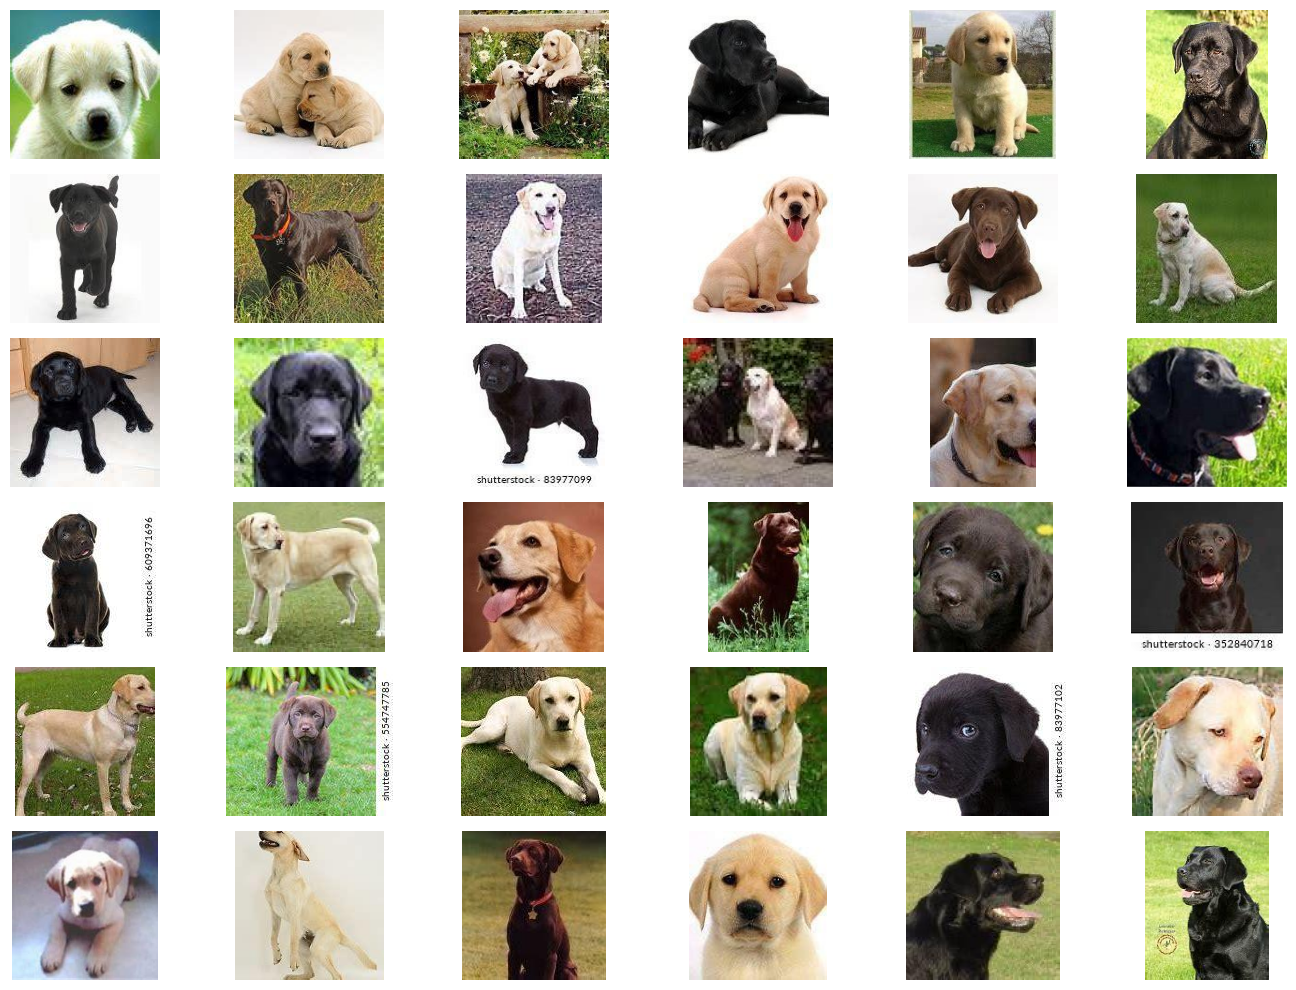

In [16]:
# Lista de archivos de las imagenes
list_img = os.listdir(carpeta_destino)

# cargo todas las imagenes
imagenes = [Image.open(os.path.join(carpeta_destino,archivo)) for archivo in list_img]
len(imagenes)

# Visualizamos varias imágenes
fig = plt.figure(figsize = (14,10))

# Elije 16 imágenes aleatorias
for n, i in enumerate(random.sample(range(0,len(imagenes)), 36)):
    fig.add_subplot(6, 6, n+1) # n_rows, n_col, subplot  
    img = imagenes[i] 
    plt.imshow(img)    
    plt.axis('off') # desactivo ejes
# Ajustar el layout para que no se solapen las imágenes
plt.tight_layout()

### **Cerramos el navegador**

In [17]:
driver.quit()

### **Conclusiones**

Al comparar los dos métodos utilizados para la búsqueda de imágenes en Bing, se evidencian varias diferencias clave en cuanto a su implementación, eficiencia y adecuación según el contexto:

**Requests + BeautifulSoup**

- *Eficiencia*: Este método es más eficiente en términos de velocidad y consumo de recursos. Al no depender de un navegador real, las solicitudes HTTP directas permiten una extracción rápida de datos.

- *Simplicidad*: La simplicidad en su implementación es notable, ya que solo requiere manejar solicitudes HTTP y analizar el HTML estático. Esto lo hace ideal para proyectos más sencillos donde no se necesita la interacción dinámica con la página web. Sin embargo, debido a que Bing tiene limitada la búsqueda a 24 imágenes, hace que el proyecto se vuelva algo más complejo en el caso de necesitar una mayor cantidad de datos.
- *Limitaciones*: Su principal desventaja radica en su incapacidad para manejar contenido dinámico que se carga a través de JavaScript. Esto puede limitar la capacidad de extracción en sitios que dependen fuertemente de la carga dinámica de contenidos, como muchas páginas modernas.

**Selenium + BeautifulSoup**

- *Capacidad Dinámica*: Selenium, al emular un navegador real, permite interactuar con el contenido dinámico, incluyendo la carga de imágenes a través de JavaScript, scroll infinito, y otras interacciones complejas que no serían posibles con requests.
- *Versatilidad*: Este método es más versátil y robusto para casos en los que se necesite acceder a elementos que no están disponibles inmediatamente al cargar la página. Por ejemplo, si las imágenes se muestran solo después de realizar scroll, Selenium es capaz de simular esta acción.
- *Sobrecarga*: Sin embargo, esta versatilidad viene con un costo en términos de velocidad y recursos. Selenium es más lento y consume más memoria al tener que cargar la interfaz completa de un navegador, lo que puede ser innecesario si no se requiere interactuar con contenido dinámico.

**Elección del Método Adecuado**

La elección entre ambos métodos depende principalmente del tipo de página que se esté analizando y los recursos disponibles. Para sitios con HTML estático y sin demasiada carga dinámica, requests + BeautifulSoup es la opción más eficiente. En cambio, para páginas con contenido dinámico que requieren interacción, Selenium + BeautifulSoup es la herramienta más adecuada, a pesar de su mayor demanda de recursos. 

En el scraping que hemos realizado en este artículo, la mejor opción es utilizar una combinación de Selenium y BeautifulSoup.

### **Referencias**

- [Python](https://www.python.org/)
- [Ipykernel](https://pypi.org/project/ipykernel/)
- [tqdm](https://pypi.org/project/tqdm/)
- [Joblib](https://pypi.org/project/joblib/)
- [Scipy](https://pypi.org/project/scipy/)
- [Request](https://pypi.org/project/requests/)
- [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)
- [Selenium](https://www.selenium.dev/)
- [webdriver-manager](https://pypi.org/project/webdriver-manager/)